In [2]:
"""
import modules
"""

from prepare_data import prepare_df_from_mac_5_year as prepare_CCL
from prepare_data import prepare_paths as prepare_paths
from emulate_reduction import emulator_v4 as emulate
from visualize_output import vis_emulator_v1 as v1_plot
from pym import pym

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os

dir(prepare_paths)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'colors',
 'combine_azure_ctax',
 'np',
 'os',
 'output_costs_timer',
 'pd',
 'plot_MAC',
 'plt',
 'prepare_data',
 'pym',
 'truncate_colormap',
 'world_MAC_data']

In [4]:
PATH = 'C:/Users/toonv/Documents/PBL/Data/cost curves/'
PATH_IAMC = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths/'
PATH_IAMC_MYM = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths_mym/'
PATH_IAMC_CSV = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths_csv/'

FILENAME_IAMC = 'iamc15_scenario_data_world_r2.0.xlsx'
FILENAME_MEAN_TEMP = 'mean_temp.csv'

IAMC_database = pd.read_excel(PATH_IAMC + FILENAME_IAMC, sheet_name='data')

costs:  4.165051e+12
costs:  1.213160e+12


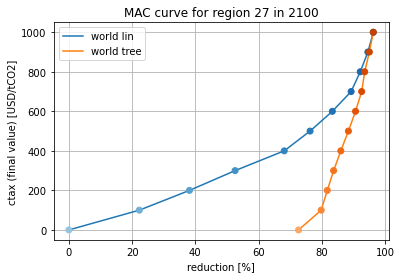

In [9]:
"""
Calculating mitigation costs using multiple methods:

    1.OG method
    2.Tree method
    3.From TIMER output variables
    
"""

reload(prepare_paths)

year = 2100

# MAC construction for lin and tree method
lin_paths = pd.read_csv('C:/Users/toonv/Documents/PBL/Data/costs_paths_csv/lin_pahts.csv', index_col=[0])
tree_paths = pd.read_csv('C:/Users/toonv/Documents/PBL/Data/costs_paths_csv/tree_pahts.csv', index_col=[0])

years = [1971, 1981, 1991, 2001, 2011, 2021, 2031, 2041, 2051, 2061, 2071, 2081, 2091, 2100]
columns = ['region', 'ctax_index'] + years  # dont know how to set headers for multi-index

emissions_lin = pd.read_csv('C:/Users/toonv/Documents/PBL/Data/paths_costs/lin_results/co2tax.csv', index_col=[0])
emissions_lin.columns = columns
emissions_tree = pd.read_csv('C:/Users/toonv/Documents/PBL/Data/paths_costs/tree_results/co2tax.csv', index_col=[0])
emissions_tree.columns = columns

baseline = emissions_lin.loc[emissions_lin.ctax_index == 0]
world_baseline = emissions_lin.loc[emissions_lin.ctax_index == 0][year].sum()

EU_lin_MAC = prepare_paths.combine_azure_ctax(2100, 11, lin_paths, emissions_lin, baseline)
EU_tree_MAC = prepare_paths.combine_azure_ctax(2100, 11, tree_paths, emissions_tree, baseline)

VS_lin_MAC = prepare_paths.combine_azure_ctax(2100, 2, lin_paths, emissions_lin, baseline)
VS_tree_MAC = prepare_paths.combine_azure_ctax(2100, 2, tree_paths, emissions_tree, baseline)

BR_lin_MAC = prepare_paths.combine_azure_ctax(2100, 4, lin_paths, emissions_lin, baseline)
BR_tree_MAC = prepare_paths.combine_azure_ctax(2100, 4, tree_paths, emissions_tree, baseline)

world_lin_MAC = prepare_paths.world_MAC_data(2100, lin_paths, emissions_lin, world_baseline)
world_tree_MAC = prepare_paths.world_MAC_data(2100, tree_paths, emissions_tree, world_baseline)

# prepare_paths.plot_MAC(EU_lin_MAC, 'EU')
# prepare_paths.plot_MAC(EU_tree_MAC, 'EU')
# prepare_paths.plot_MAC(VS_lin_MAC, 'VS')
# prepare_paths.plot_MAC(VS_tree_MAC, 'VS')
# prepare_paths.plot_MAC(BR_lin_MAC, 'BR lin', 'Blues')
# prepare_paths.plot_MAC(BR_tree_MAC, 'BR tree', 'Oranges')
prepare_paths.plot_MAC(world_lin_MAC, 'world lin', 'Blues')
prepare_paths.plot_MAC(world_tree_MAC, 'world tree', 'Oranges')

# en de variabelen stacked graph 
t_system_cost_tree = pd.read_csv('C:/Users/toonv/Documents/PBL/Data/paths_costs/tree_results/TotalSystemCost.csv', index_col=[0])
t_system_cost_rel_tree = pd.read_csv('C:/Users/toonv/Documents/PBL/Data/paths_costs/tree_results/TotalSystemCostRel.csv', index_col=[0])

t_system_cost_lin = pd.read_csv('C:/Users/toonv/Documents/PBL/Data/paths_costs/lin_results/TotalSystemCost.csv', index_col=[0])
t_system_cost_rel_lin = pd.read_csv('C:/Users/toonv/Documents/PBL/Data/paths_costs/lin_results/TotalSystemCostRel.csv', index_col=[0])

baseline_system_cost = t_system_cost_lin.loc[t_system_cost_lin.region == 27]

# tree_table = prepare_paths.output_costs_timer(t_system_cost_tree, t_system_cost_rel_tree,
#                                               year, 27, tree_paths, baseline_system_cost)

# tree_table.to_excel('C:/Users/toonv/Documents/PBL/Data/paths_costs/tree_results/tree_table.xlsx')
                    
# lin_table = prepare_paths.output_costs_timer(t_system_cost_lin, t_system_cost_rel_lin,
#                                              year, 27, lin_paths, baseline_system_cost)
                    
# lin_table.to_excel('C:/Users/toonv/Documents/PBL/Data/paths_costs/lin_results/lin_table.xlsx')


29498140341930.0
201500573746680.0
48089945197690.0
48110972824000.0
9402128286030.0
8365245104634.8
44091763640650.0
38895219210040.0
21453433997091.0
465475307129320.0


,onecol
0,1971
1,4.65091e+08
2,1.492086e+10
3,4.03713e+09
4,1.546581e-17


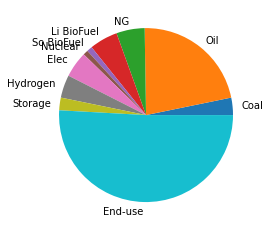

In [11]:
table = pd.read_table('C:/Users/toonv/Documents/PBL/Data/paths_costs/lin_results/TCostTot.dat', sep = ',', names = ['onecol'], index_col=False)
years = [2100]
table.iloc[0] = 1971
year_indices = [table.loc[table['onecol'] == str(year)].index.values for year in years]

table.iloc[-1] = 2.582932e+14

shares = []

for count, year_index in enumerate(year_indices):
    year_index = year_index[0]
    column = years[count]
    first_column = table[year_index:year_index+29]  #all first 28 values all regions
    first_col = sum(np.array(first_column['onecol'][1:].values).astype(float))  #skip the first row which is year
    
    print(first_col)
    
    shares.append(first_col)
    
    for i in range(29, 281, 28):
        sum_column = sum(np.array(table[year_index+i:year_index+i+28]['onecol'].values).astype(float))
        
        print(sum_column)
        
        shares.append(sum_column)


plt.pie(shares, labels=['Coal', 'Oil', 'NG', 'Li BioFuel', 'So BioFuel', 'Nuclear', 'Elec', 'Hydrogen', 'Storage', 'End-use'])


table.head()

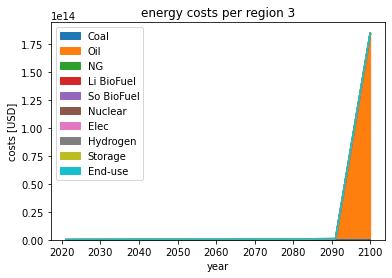

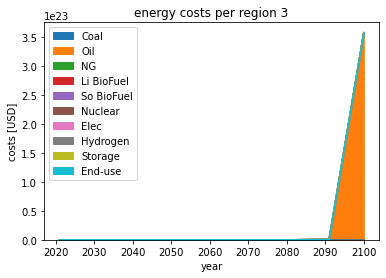

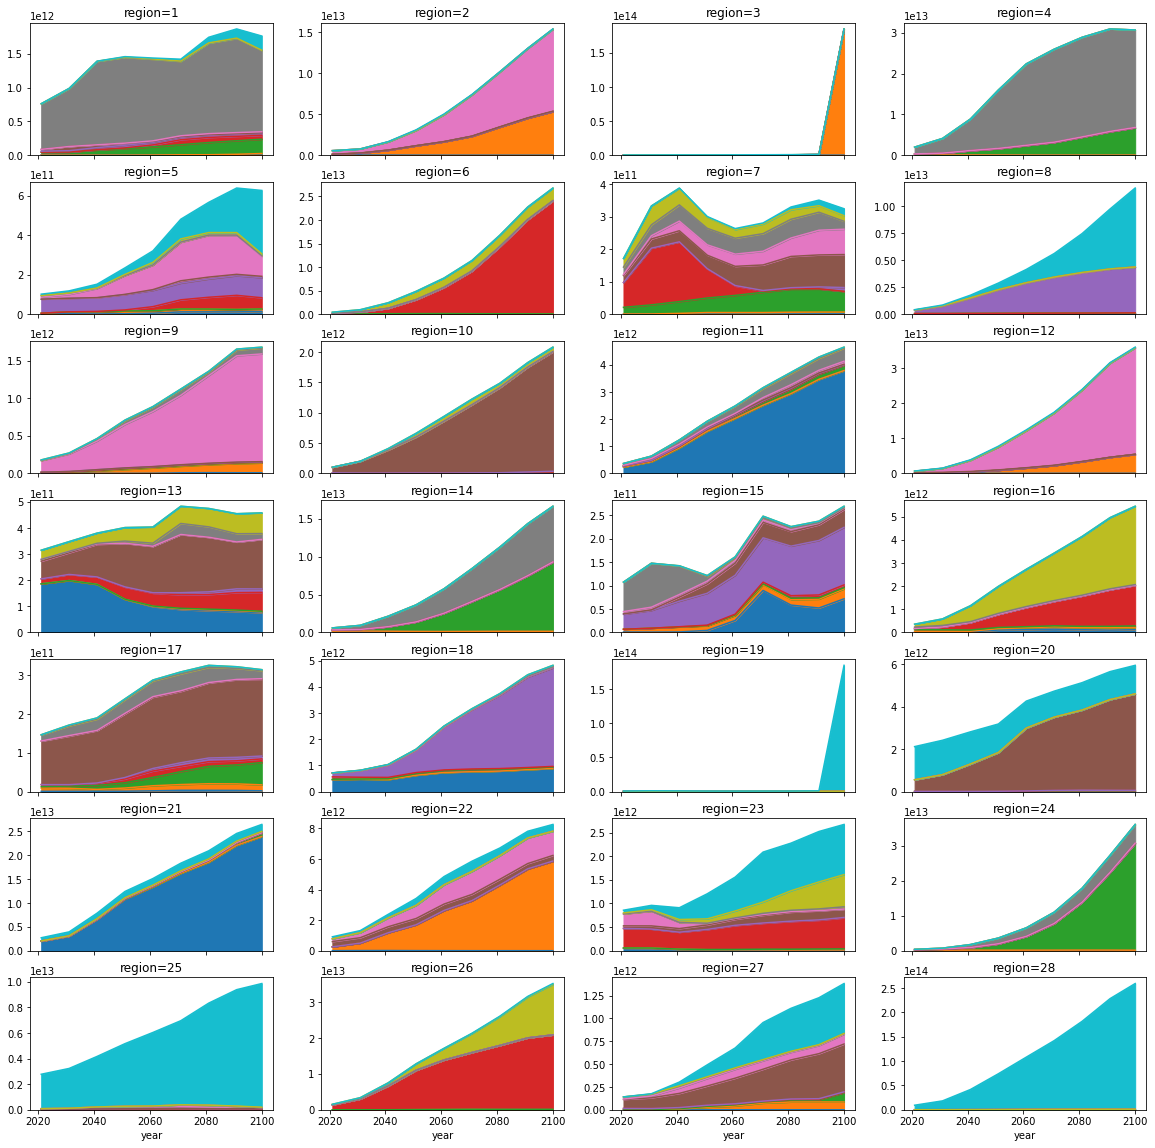

In [264]:
"""
stacked graph for baseline and mitigation scenario, 
show over time how each element is changing with area plot
"""

totcost_ctax_0 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/paths_costs/lin_results/TCostTot_ctax_0.dat', sep = ',', names = ['onecol'], index_col=False)
totcost_ctax_1000 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/paths_costs/lin_results/TCostTot_ctax_1000.dat', sep = ',', names = ['onecol'], index_col=False)
region = 2

totcost_ctax_0.iloc[-1] = 1.36199e+14
totcost_ctax_1000.iloc[-1] = 2.582932e+14

def stacked_graph(table, region):
        
    years = [2021, 2031, 2041, 2051, 2061, 2071, 2081, 2091, 2100]
    columns=['Coal', 'Oil', 'NG', 'Li BioFuel', 'So BioFuel', 'Nuclear', 'Elec', 'Hydrogen', 'Storage', 'End-use']
    table.iloc[0] = 1971
    year_indices = [table.loc[table['onecol'] == str(year)].index.values for year in years]
                
    shares_list = []
    
    for count, year_index in enumerate(year_indices):
        
        shares = []
        
        year_index = year_index[0]
        column = years[count]
        first_column = table[year_index:year_index+28]  #all first 28 values all regions
        first_col = np.array(first_column['onecol'].values).astype(float)  #skip the first row which is year
        
        shares.append(first_col[region])

        for count_2, i in enumerate(range(29, 281, 28)):
            
            shares_col = columns[count_2+1]
            
            row = year_index + i + region
                                    
            world_sector_cost = table.iloc[row]['onecol']
                                    
            shares.append(world_sector_cost)
            
#             print(count, shares_col, world_sector_cost)
        
        shares_list.append(shares)
                        
    shares_df = pd.DataFrame(shares_list, columns=columns) 
    shares_df['year'] = years
    shares_df.set_index('year', drop=True, inplace=True)
    shares_df = shares_df.astype(float)
    
    return shares_df
    
shares_1000 = stacked_graph(totcost_ctax_1000, region)
shares_0 = stacked_graph(totcost_ctax_0, region)

shares_1000.plot.area(y=['Coal', 'Oil', 'NG', 'Li BioFuel', 'So BioFuel', 'Nuclear', 'Elec', 'Hydrogen', 'Storage'],
                           stacked=True, ylabel='costs [USD]', title=f'energy costs per region {region + 1}')

shares_1000.plot.area(stacked=True, ylabel='costs [USD]', title=f'energy costs per region {region + 1}')

shares_0.plot.area(stacked=True, ylabel='costs [USD]', title=f'energy costs per region {region + 1}')

shares_0.tail()

all_regions = [i for i in range(28)]

plt.figure(1, figsize=(100, 60), dpi=180)

for index, region in enumerate(all_regions):
    
    costs = stacked_graph(totcost_ctax_1000, region)
    
    plt.subplot(7,4,index+1)
    
    costs.plot.area(stacked=True, legend=False, ax=plt.gca(), sharex='years', title=f'region={region+1}',
                   figsize=(20,20))
    
plt.savefig('C:/Users/toonv/Documents/PBL/Figs/costs_per_region.jpeg') 